# 중고차 가격 예측 분석모델 만들기

## 필요한 데이터 불러오기

In [509]:
import pandas as pd

df = pd.read_csv("../data/Dubizzle_used_car_sales.csv")

In [510]:
# 데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

In [511]:
# 결측치 확인하기
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

1. 실린더 결측치 대체
2. year 결측치 대체
3. motors_trim 결측치 대체


## 데이터EDA
1. 실린더 결측치 대체

In [512]:
# no_of_cylinders
df['no_of_cylinders'].value_counts()

no_of_cylinders
6          3325
4          2993
8          2986
12          366
Unknown      57
3            56
10           53
5            53
Name: count, dtype: int64

<Axes: xlabel='no_of_cylinders'>

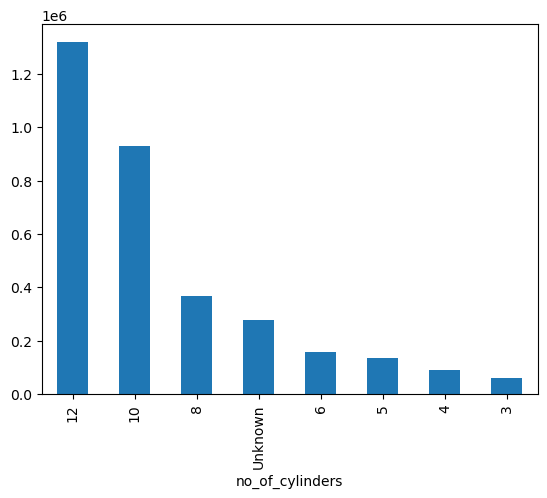

In [513]:
# 시각화
cylinder = df.groupby('no_of_cylinders')['price_in_aed'].mean().sort_values(ascending=False)
cylinder.plot(kind='bar')

실린더의 개수에 따라서 중고차가격이 증가함을 예상할 수 있다.

In [514]:
# 실린더를 숫자타입으로 변경
df['no_of_cylinders'] = pd.to_numeric(df['no_of_cylinders'], errors='coerce')

실린더는 보통 마력(자동차의 엔진의 출력)과 관련이 있다.

가설: 실린더의 수와 마력의 수가 양의 상관관계가 있다.

In [515]:
# 범주화된 마력수치-> 대푯값으로 변경
def hp_to_numeric(hp):
    if '200 - 300 HP' in hp:
        return 250
    elif '300 - 400 HP' in hp:
        return 350
    elif '400 - 500 HP' in hp:
        return 450
    elif '150 - 200 HP' in hp:
        return 175
    elif '500 - 600 HP' in hp:
        return 550
    elif '600 - 700 HP' in hp:
        return 650
    elif '700 - 800 HP' in hp:
        return 750
    elif '800 - 900 HP' in hp:
        return 850
    elif '900+ HP' in hp:
        return 950
    elif 'Less than 150 HP' in hp:
        return 100
    else:
        return None 

df['horsepower_numeric'] = df['horsepower'].apply(hp_to_numeric)

In [516]:
df['horsepower'].value_counts()

horsepower
200 - 300 HP        2432
300 - 400 HP        2208
400 - 500 HP        1279
150 - 200 HP        1222
500 - 600 HP        1027
Unknown              814
Less than 150 HP     394
600 - 700 HP         391
700 - 800 HP         153
800 - 900 HP          30
900+ HP               20
Name: count, dtype: int64

In [517]:
# 실린더와 마력의 상관관계분석
df['no_of_cylinders'].corr(df['horsepower_numeric'])

np.float64(0.7513397805646936)

0.75의 수치로 강한 양의 상관관계가 있음을 알아냈다.

In [518]:
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders         138
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
horsepower_numeric      814
dtype: int64

In [519]:
df['no_of_cylinders'].mean()

np.float64(6.221013018714402)

In [520]:
# 실린더 평균값으로 대치
mean_cylinders = df['no_of_cylinders'].mean()
df['no_of_cylinders'] = df['no_of_cylinders'].fillna(int(mean_cylinders))

In [521]:
df['no_of_cylinders'].corr(df['horsepower_numeric'])

np.float64(0.7468878877161271)

In [522]:
df

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022,NaN
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8.0,Automatic Transmission,North American Specs,...,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022,450.0
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022,450.0
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022,650.0
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4.0,Manual Transmission,GCC Specs,...,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021,550.0
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022,450.0
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8.0,Automatic Transmission,Other,...,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021,450.0
9968,Chevrolet Malibu GCC Spec,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4.0,Automatic Transmission,GCC Specs,...,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022,175.0


In [523]:
df['horsepower_numeric'].fillna(df['horsepower_numeric'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\1639290780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower_numeric'].fillna(df['horsepower_numeric'].median(), inplace=True)


In [524]:
# df = df.drop(columns='horsepower_numeric')

실린더 결측치 값을 평균으로 대체했을 경우 상관관계가 0.74정도로 0.01 밖에 낮아지지 않았기 때문에 사용

2. year 결측치 대체

가설: kilometers와 year의 상관성이 있을 것 같다.

자동차를 오래탔을수록 주행거리가 많을 것이라는 예상

In [525]:
# 년도와 주행거리의 상관성
df['year'].corr(df['kilometers'])

np.float64(-0.052350972522608785)

In [526]:
# 파생변수 생성
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%d/%m/%Y')
df['post_year'] = df['date_posted'].dt.year

df['year_1'] = df['post_year'] - df['year']
df['year_1'].value_counts()

year_1
 6.0     953
 7.0     908
 3.0     888
 4.0     855
 1.0     840
 2.0     808
 5.0     808
 8.0     753
 9.0     576
 10.0    384
 11.0    243
 13.0    188
 14.0    174
 12.0    167
 15.0     96
 0.0      88
 16.0     71
 17.0     57
 18.0     24
 19.0     17
 21.0     16
 20.0     13
 23.0      9
 22.0      9
 24.0      7
 33.0      4
 32.0      4
 39.0      3
 31.0      3
 30.0      3
 57.0      3
 49.0      2
 35.0      2
 28.0      2
 25.0      2
 51.0      2
 42.0      2
 61.0      1
 40.0      1
 66.0      1
 47.0      1
 56.0      1
 48.0      1
-2.0       1
 53.0      1
 27.0      1
 69.0      1
 43.0      1
 38.0      1
 45.0      1
 46.0      1
 50.0      1
 52.0      1
Name: count, dtype: int64

In [527]:
df[df['year_1'] < 0]

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric,post_year,year_1
4000,Toyota Hiace High Roof 15 Seater 2.5 Diesel MY...,105000,0,Perfect inside and out,Perfect inside and out,Dealer,SUV,4.0,Manual Transmission,Other,...,2021.0,White,Dubai,Commuter Super LWB,toyota,hiace,2019-09-03,250.0,2019,-2.0


In [528]:
df[(df['model'] =='hiace') &(df['body_type']=='SUV')]

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric,post_year,year_1
4000,Toyota Hiace High Roof 15 Seater 2.5 Diesel MY...,105000,0,Perfect inside and out,Perfect inside and out,Dealer,SUV,4.0,Manual Transmission,Other,...,2021.0,White,Dubai,Commuter Super LWB,toyota,hiace,2019-09-03,250.0,2019,-2.0


년식이 21년도 차량인데 19년도에 게시글을 올렸다는 게 말이 안되므로 데이터를 삭제하겠다.

-> 모델명이 같고 SUV인 차량이 없으므로 년식을 알 수 없으니 그냥 삭제

In [529]:
df = df.drop(index=4000)

In [530]:
df['year_1'].describe()

count    8999.000000
mean        6.296255
std         4.732781
min         0.000000
25%         3.000000
50%         6.000000
75%         8.000000
max        69.000000
Name: year_1, dtype: float64

In [531]:
# 상관관계분석
df['year_1'].corr(df['kilometers'])

np.float64(0.05276655701073056)

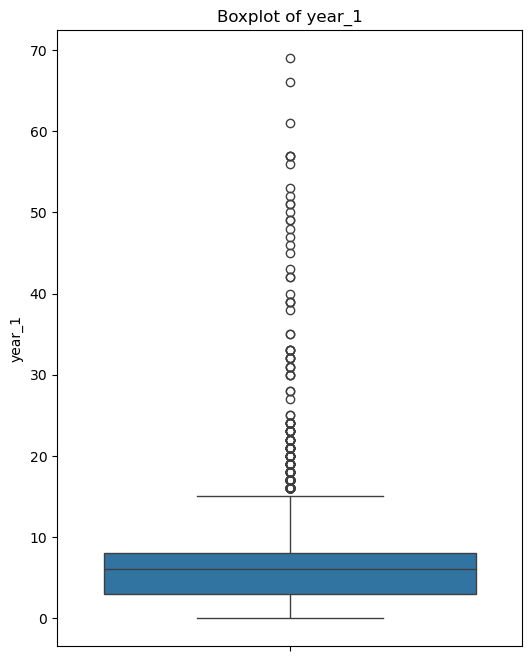

In [532]:
import matplotlib.pyplot as plt
import seaborn as sns

# 혹시 모를 NaN 제거
data = df['year_1'].dropna()

plt.figure(figsize=(6, 8))
sns.boxplot(y=data)
plt.title('Boxplot of year_1')
plt.show()

In [533]:
# 이상치를 max값으로 대체
Q1 = df['year_1'].quantile(0.25)
Q3 = df['year_1'].quantile(0.75)
IQR = Q3 - Q1

upper_fence = Q3 + 1.5 * IQR
print(f'Upper fence: {upper_fence}')

import numpy as np

# 이상치 상한 + 1 기준으로 대체
df['year_1'] = np.where(df['year_1'] > upper_fence, upper_fence + 1, df['year_1'])


Upper fence: 15.5


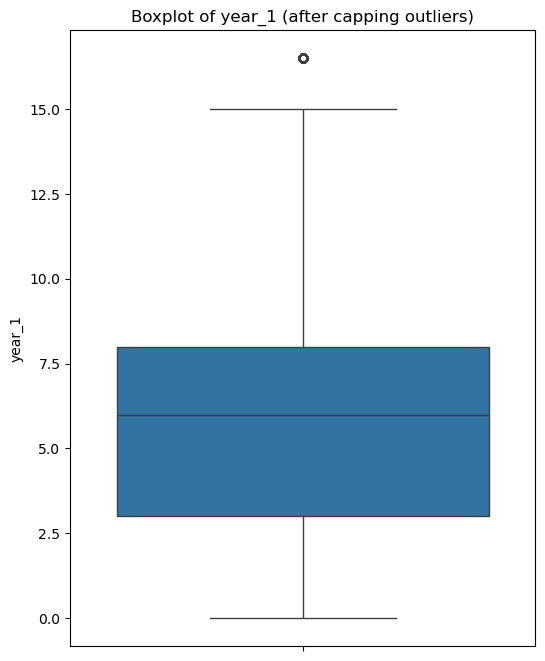

In [534]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
sns.boxplot(y=df['year_1'])
plt.title('Boxplot of year_1 (after capping outliers)')
plt.show()

In [535]:
df['year_1'].corr(df['kilometers'])

np.float64(0.06611122053166134)

차량의 오래된 정도와 주행거리가 많은 상관성을 가져오지 않으므로 오래된 정도가 크면 상한 +1의 값으로 대체시켰다.

In [536]:
# kilometers = 0
df[df['kilometers']==0]['year_1'].describe()

count    235.000000
mean       1.110638
std        1.182355
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       13.000000
Name: year_1, dtype: float64

주행거리가 0이면 보통 사용년도가 1년도이기 때문에 year_1을 1으로 대체하겠다.

In [537]:
df.loc[df['kilometers'] == 0, 'year_1'] = 1

In [538]:
df[df['year_1'].isna()]

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric,post_year,year_1
129,Mercedes-Benz E 300 GCC 2022 5-Years Warranty,355000,39,Perfect inside and out,Perfect inside and out,Dealer,Sedan,4.0,Automatic Transmission,GCC Specs,...,NaN,Black,Dubai,E 300,mercedes-benz,e-class,2022-03-30,175.0,2022,NaN
131,BRAND NEW 2022 BENTLEY CONTINENTAL GTC V8 l W...,1229000,79,Perfect inside and out,Perfect inside and out,Dealer,Soft Top Convertible,8.0,Automatic Transmission,Other,...,NaN,White,Dubai,GTC,bentley,continental,2022-05-07,550.0,2022,NaN
195,2022 RANGE ROVER SPORT HSE l WARRANTY+SERVICE ...,389000,14,Perfect inside and out,Perfect inside and out,Dealer,SUV,4.0,Automatic Transmission,Other,...,NaN,Black,Dubai,HSE,land-rover,range-rover-sport,2022-05-06,250.0,2022,NaN
222,2022 | Porsche | Macan | GTS | GCC Spec | With...,459000,33,Perfect inside and out,Perfect inside and out,Dealer,SUV,6.0,Automatic Transmission,GCC Specs,...,NaN,Grey,Dubai,GTS,porsche,macan,2022-04-01,450.0,2022,NaN
228,2022 Ford Expedition,155000,22000,Perfect inside and out,Perfect inside and out,Dealer,Other,6.0,Automatic Transmission,European Specs,...,NaN,Black,Sharjah,Other,ford,expedition,2022-05-09,350.0,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,Rolls Royce Cullinan 2022 Grey+ Black New | WA...,2190000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,12.0,Automatic Transmission,GCC Specs,...,NaN,Grey,Dubai,Standard,rolls-royce,cullinan,2022-04-06,550.0,2022,NaN
9936,BMW 730Li Pure Excellence (REF# 128396),374000,4535,Perfect inside and out,Perfect inside and out,Dealership/Certified Pre-Owned,Sedan,4.0,Automatic Transmission,GCC Specs,...,NaN,Black,Dubai,730Li,bmw,7-series,2022-04-07,250.0,2022,NaN
9961,2022 | LAMBORGHINI | HURACAN | EVO |SPYDER | L...,1499000,326,Perfect inside and out,Perfect inside and out,Dealer,Soft Top Convertible,10.0,Automatic Transmission,European Specs,...,NaN,Green,Dubai,Other,lamborghini,huracan,2022-01-25,650.0,2022,NaN
9963,"AED 1,211 /MONTH((WARRANTY AND SERVICE CONTRAC...",79000,25,Perfect inside and out,Perfect inside and out,Dealer,SUV,4.0,Automatic Transmission,GCC Specs,...,NaN,Brown,Dubai,Comfort,jetour,x70,2021-10-20,175.0,2021,NaN


나머지 사용년도 결측치는 중위값으로 대체

-> 주행거리와 연관을 지으면 인위적인 상관관계를 만드는 느낌이라 평균이나 중위값으로 대치하는게 적절하다고 판단.

In [539]:
median_year = df['year_1'].median()
df['year_1'] = df['year_1'].fillna(median_year)

In [540]:
df.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders           0
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
horsepower_numeric        0
post_year                 0
year_1                    0
dtype: int64

3. moters_trim 결측치 대체

 같은 model명의 최빈값으로 대치

In [541]:
# 1) 모델별 최빈값 구하는 함수 정의
def fill_trim_mode(group):
    mode_value = group['motors_trim'].mode()
    if len(mode_value) > 0:
        # 최빈값이 여러 개면 첫 번째 값 선택
        group['motors_trim'] = group['motors_trim'].fillna(mode_value[0])
    else:
        # motors_trim 모두 NaN인 경우 (최빈값이 없으면 NaN 유지)
        group['motors_trim'] = group['motors_trim'].fillna(np.nan)
    return group

# 2) 모델명별로 그룹화하여 결측치 대체
df = df.groupby('model').apply(fill_trim_mode).reset_index(drop=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\1218622078.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group['motors_trim'] = group['motors_trim'].fillna(np.nan)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2304\1218622078.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('model').apply(fill_trim_mode).reset_index(drop=True)


In [542]:
df[df['motors_trim'].isna()]

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric,post_year,year_1
4045,Genesis G80,62000,40000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6.0,Automatic Transmission,North American Specs,...,2017.0,Silver,Sharjah,NaN,genesis,g80,2022-02-21,350.0,2022,5.0


In [543]:
df[df['model']=='g80']

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,...,year,color,emirate,motors_trim,company,model,date_posted,horsepower_numeric,post_year,year_1
4045,Genesis G80,62000,40000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6.0,Automatic Transmission,North American Specs,...,2017.0,Silver,Sharjah,NaN,genesis,g80,2022-02-21,350.0,2022,5.0


In [544]:
df.loc[df['model'] == 'g80', 'motors_trim'] = 'other'

G80 모델은 하나밖에 없으므로 other로 처리

## 데이터전처리

범주형 원-핫인코딩

In [545]:
df.columns

Index(['title', 'price_in_aed', 'kilometers', 'body_condition',
       'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company',
       'model', 'date_posted', 'horsepower_numeric', 'post_year', 'year_1'],
      dtype='object')

In [546]:
# 필요없는 칼럼 삭제
df = df.drop(columns=['title','horsepower','post_year','date_posted'])

In [547]:
df['transmission_type'].value_counts()

transmission_type
Automatic Transmission    9581
Manual Transmission        388
Name: count, dtype: int64

In [548]:
# body_condition 
df['body_condition'].value_counts()

body_condition
Perfect inside and out                9611
No accidents, very few faults          208
A bit of wear & tear, all repaired     119
Normal wear & tear, a few issues        31
Name: count, dtype: int64

In [549]:
# 순서형 라벨링
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder(categories=[[
    'Perfect inside and out',
    'No accidents, very few faults',
    'A bit of wear & tear, all repaired',
    'Normal wear & tear, a few issues'
]])

df['body_condition_num'] = encoder.fit_transform(df[['body_condition']])
# 결과는 0부터 시작하니, +1 해주면 원하는 1~4로 맞춤 가능
df['body_condition_num'] = df['body_condition_num'] + 1


In [550]:
df['body_condition_num'].value_counts()

body_condition_num
1.0    9611
2.0     208
3.0     119
4.0      31
Name: count, dtype: int64

In [551]:
df['mechanical_condition'].value_counts()

mechanical_condition
Perfect inside and out              9821
Minor faults, all fixed              136
Major faults fixed, small remain       8
Ongoing minor & major faults           3
Major faults, all fixed                1
Name: count, dtype: int64

In [552]:
# 순서형 라벨링
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

encoder = OrdinalEncoder(categories=[[
    'Perfect inside and out',
    'Minor faults, all fixed',
    'Major faults fixed, small remain',
    'Ongoing minor & major faults'
    ,'Major faults, all fixed'
]])

df['mechanical_condition_num'] = encoder.fit_transform(df[['mechanical_condition']])
# 결과는 0부터 시작하니, +1 해주면 원하는 1~4로 맞춤 가능
df['mechanical_condition_num'] = df['mechanical_condition_num'] + 1

In [553]:
df = df.drop(columns=['body_condition','mechanical_condition'])

In [554]:
df = df.drop(columns=['steering_side'])

In [555]:
# 상위 10개 모델만 남기고 나머지는 'Other'
top_models = df['model'].value_counts().nlargest(25).index
df['model_grouped'] = df['model'].where(df['model'].isin(top_models), other='Other')

In [556]:
df_encoded = pd.get_dummies(df, columns=['model_grouped'])

In [557]:
df_encoded = df_encoded.drop(columns=['color','company'])

In [558]:
df_encoded = df_encoded.drop(columns=['model'])

In [559]:
# motors_trim 상위 6개
top_motors_trim = df['motors_trim'].value_counts().head(12).index
df['motors_trim_grp'] = df['motors_trim'].where(df['motors_trim'].isin(top_motors_trim), other='Other')

# fuel_type 상위 6개
top_fuel_type = df['fuel_type'].value_counts().head(6).index
df['fuel_type_grp'] = df['fuel_type'].where(df['fuel_type'].isin(top_fuel_type), other='Other')

# emirate 상위 4개
top_emirate = df['emirate'].value_counts().head(4).index
df['emirate_grp'] = df['emirate'].where(df['emirate'].isin(top_emirate), other='Other')

# body_type 상위 5개
top_body_type = df['body_type'].value_counts().head(5).index
df['body_type_grp'] = df['body_type'].where(df['body_type'].isin(top_body_type), other='Other')

In [560]:
cols_to_encode = [
    'motors_trim_grp',
    'fuel_type_grp',
    'regional_specs',
    'emirate_grp',
    'transmission_type',
    'seller_type',
    'body_type_grp'
]
for col in cols_to_encode:
    print(df[col].value_counts())

motors_trim_grp
Other       8046
Standard     432
SE           232
S            227
G 63 AMG     197
Sport        152
Limited      133
HSE          130
GLS          123
SV           114
GXR           92
Luxury        91
Name: count, dtype: int64
fuel_type_grp
Gasoline    9695
Diesel       166
Electric      85
Hybrid        23
Name: count, dtype: int64
regional_specs
GCC Specs               7601
North American Specs    1147
Other                    550
European Specs           422
Japanese Specs           249
Name: count, dtype: int64
emirate_grp
 Dubai        7977
 Sharjah       953
 Abu Dhabi     710
Other          190
 Ajman         139
Name: count, dtype: int64
transmission_type
Automatic Transmission    9581
Manual Transmission        388
Name: count, dtype: int64
seller_type
Dealer                            6761
Owner                             2938
Dealership/Certified Pre-Owned     270
Name: count, dtype: int64
body_type_grp
SUV              4565
Sedan            2748
Other   

In [561]:
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=False)

In [562]:
df_encoded = df_encoded.drop(columns=df_encoded.select_dtypes(include=['object']).columns)


In [563]:
df_encoded

,price_in_aed,kilometers,no_of_cylinders,year,horsepower_numeric,year_1,body_condition_num,mechanical_condition_num,motors_trim_grp_G 63 AMG,motors_trim_grp_GLS,...,transmission_type_Manual Transmission,seller_type_Dealer,seller_type_Dealership/Certified Pre-Owned,seller_type_Owner,body_type_grp_Coupe,body_type_grp_Hatchback,body_type_grp_Other,body_type_grp_Pick Up Truck,body_type_grp_SUV,body_type_grp_Sedan
0,55000,73000,4.0,2015.0,100.0,7.0,1.0,1.0,False,False,...,False,True,False,False,False,True,False,False,False,False
1,72000,92000,4.0,2016.0,175.0,6.0,1.0,1.0,False,False,...,False,False,False,True,False,True,False,False,False,False
2,88000,35665,4.0,2018.0,250.0,4.0,1.0,1.0,False,False,...,False,True,False,False,False,True,False,False,False,False
3,31000,115000,4.0,2014.0,100.0,8.0,2.0,2.0,False,False,...,False,False,False,True,False,True,False,False,False,False
4,17900,190000,4.0,2009.0,175.0,13.0,1.0,1.0,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,65000,98000,6.0,2015.0,250.0,7.0,1.0,1.0,False,False,...,False,False,False,True,False,False,True,False,False,False
9965,82000,68000,4.0,2014.0,250.0,8.0,1.0,1.0,False,False,...,False,False,False,True,False,False,True,False,False,False
9966,699000,55213,8.0,2001.0,350.0,16.5,1.0,1.0,False,False,...,True,True,False,False,False,False,True,False,False,False
9967,136500,10000,4.0,2020.0,175.0,2.0,1.0,1.0,False,False,...,False,True,False,False,False,False,False,False,True,False


## 데이터분할

In [564]:
X = df_encoded.drop(columns=['price_in_aed'])
y = df_encoded['price_in_aed']

In [565]:
X = df_encoded.drop(columns=['price_in_aed'])
X = X.drop(columns='year')

In [566]:
X.columns

Index(['kilometers', 'no_of_cylinders', 'horsepower_numeric', 'year_1',
       'body_condition_num', 'mechanical_condition_num',
       'motors_trim_grp_G 63 AMG', 'motors_trim_grp_GLS',
       'motors_trim_grp_GXR', 'motors_trim_grp_HSE', 'motors_trim_grp_Limited',
       'motors_trim_grp_Luxury', 'motors_trim_grp_Other', 'motors_trim_grp_S',
       'motors_trim_grp_SE', 'motors_trim_grp_SV', 'motors_trim_grp_Sport',
       'motors_trim_grp_Standard', 'fuel_type_grp_Diesel',
       'fuel_type_grp_Electric', 'fuel_type_grp_Gasoline',
       'fuel_type_grp_Hybrid', 'regional_specs_European Specs',
       'regional_specs_GCC Specs', 'regional_specs_Japanese Specs',
       'regional_specs_North American Specs', 'regional_specs_Other',
       'emirate_grp_ Abu Dhabi', 'emirate_grp_ Ajman', 'emirate_grp_ Dubai',
       'emirate_grp_ Sharjah', 'emirate_grp_Other',
       'transmission_type_Automatic Transmission',
       'transmission_type_Manual Transmission', 'seller_type_Dealer',
       '

In [567]:
X

,kilometers,no_of_cylinders,horsepower_numeric,year_1,body_condition_num,mechanical_condition_num,motors_trim_grp_G 63 AMG,motors_trim_grp_GLS,motors_trim_grp_GXR,motors_trim_grp_HSE,...,transmission_type_Manual Transmission,seller_type_Dealer,seller_type_Dealership/Certified Pre-Owned,seller_type_Owner,body_type_grp_Coupe,body_type_grp_Hatchback,body_type_grp_Other,body_type_grp_Pick Up Truck,body_type_grp_SUV,body_type_grp_Sedan
0,73000,4.0,100.0,7.0,1.0,1.0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
1,92000,4.0,175.0,6.0,1.0,1.0,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,35665,4.0,250.0,4.0,1.0,1.0,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,115000,4.0,100.0,8.0,2.0,2.0,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
4,190000,4.0,175.0,13.0,1.0,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,98000,6.0,250.0,7.0,1.0,1.0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
9965,68000,4.0,250.0,8.0,1.0,1.0,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
9966,55213,8.0,350.0,16.5,1.0,1.0,False,False,False,False,...,True,True,False,False,False,False,True,False,False,False
9967,10000,4.0,175.0,2.0,1.0,1.0,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


## 모델만들기 및 모델 성능 분석

In [568]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [571]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_val_np = np.array(X_test)
y_val_np = np.array(y_test)

train_data = lgb.Dataset(X_train_np, label=y_train_np)
val_data = lgb.Dataset(X_val_np, label=y_val_np)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.01,
    'num_leaves': 50,
    'max_depth': 8
}

model = lgb.train(params,
                  train_data,
                  valid_sets=[val_data],
                  num_boost_round=5000,
                  early_stopping_rounds=100)

y_pred = model.predict(X_val_np, num_iteration=model.best_iteration)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Validation RMSE: {rmse:.4f}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.4f}')

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 7975, number of used features: 43
[LightGBM] [Info] Start training from score 250330.233856
[1]	valid_0's rmse: 400688
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 397451
[3]	valid_0's rmse: 394245
[4]	valid_0's rmse: 391152
[5]	valid_0's rmse: 388029
[6]	valid_0's rmse: 385016
[7]	valid_0's rmse: 381969
[8]	valid_0's rmse: 379032
[9]	valid_0's rmse: 376062
[10]	valid_0's rmse: 373201
[11]	valid_0's rmse: 370302
[12]	valid_0's rmse: 367449
[13]	valid_0's rmse: 364689
[14]	valid_0's rmse: 361906
[15]	valid_0's rmse: 359214
[16]	valid_0's rmse: 356500
[17]	valid_0's rmse: 353900
[18]	valid_0's rmse: 351268
[19]	valid_0's rmse: 348764
[20

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- 모델: LightGBM
- 결정계수: 0.83
- RMSE: 166432(즉, 평균적으로 예측값이 실제 가격과 ±166,432 AED 정도 차이남.)